In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("height-weight.csv")

In [15]:
# g  =sns.displot(data=df['Height'], kde=True)
print(g.ax)

Axes(0.106306,0.116556;0.863694x0.853444)


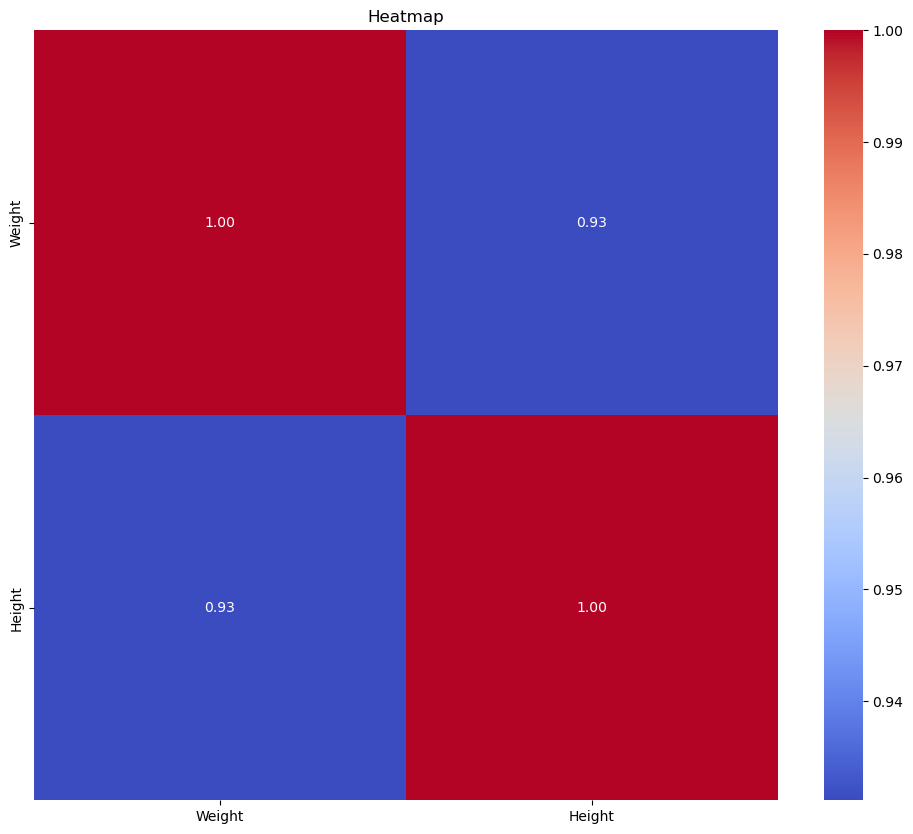

In [3]:
plt.figure(figsize=(12, 10))  # Change the size as needed
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})

plt.title('Heatmap')
plt.show()


In [ ]:
df.head(5)
df.columns

In [ ]:
## Scatterplot
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Weight vs Height')

In [ ]:
## Finding the correlation between the features 
df.corr()

In [ ]:
## More visualization 
import seaborn as sns

sns.pairplot(df)

In [ ]:
# Seeing this, we get the feeling that simple linear regression will work very well here

X=df[['Weight']] ### Independent feature should be a dataframe or 2d array as algo expects it
y=df['Height'] ### This can be a series or 1d array 


In [ ]:
### Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
print(scaler.transform([[72]]))

In [ ]:
plt.scatter(X_train,y_train)
print(scaler.transform([[72]]))

In [ ]:
## Apply Simple linear regression

from sklearn.linear_model import LinearRegression

regression = LinearRegression()


In [ ]:
regression.fit(X_train, y_train)

In [ ]:
print("Coefficient/Slope is: ", regression.coef_) # One unit movement in weight leads to approx 18 units of change in height 
print("Intercept is: ", regression.intercept_)

In [ ]:
## Plot best fit line
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

In [ ]:
## prediction for test data 
y_pred = regression.predict(X_test)

In [ ]:
## Performance metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mae, mse, rmse)

In [ ]:
### R-squared 
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
print(score)

In [ ]:
### Adjusted R-squared
print(1 - (1 - score) * (len(y_test)-1)/ (len(y_test)-X_test.shape[1]-1))

In [ ]:
### Using OLS method 
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()


In [ ]:
print(model.predict(X_test))

In [ ]:
print(model.summary())

In [ ]:
### Prediction for new data
print(scaler.transform([[72]]))

In [ ]:
regression.predict((scaler.transform([[72]])))

In [ ]:
#### Assumption for a linear regression model 
# 1) Plot a scatter plot bw y_test and y_pred_test for the prediction - should be linearly distributed
# 2) Residuals (y_test - y_pred_test) should follow an approximate normal distribution
# 3) scatter plots between residuals and prediction should be scattered non-uniformly  